<a href="https://colab.research.google.com/github/Srinivas26k/srvdb/blob/master/SrvDB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install srvdb numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.9/704.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5


In [ ]:
import srvdb

# Initialize
db = srvdb.SvDBPython("./vectors")

# Bulk insert (optimized)
ids = [f"doc_{i}" for i in range(100000)]
embeddings = [[0.1] * 1536 for _ in range(100000)]
metadatas = [f'{{"id": {i}}}' for i in range(100000)]

db.add(ids=ids, embeddings=embeddings, metadatas=metadatas)
db.persist()

# Fast search
results = db.search(query=[0.1] * 1536, k=10)
for id, score in results:
    print(f"{id}: {score:.4f}")

doc_57136: 1.0000
doc_2: 1.0000
doc_3: 1.0000
doc_4: 1.0000
doc_5: 1.0000
doc_6: 1.0000
doc_7: 1.0000
doc_8: 1.0000
doc_9: 1.0000
doc_10: 1.0000


# Task
Redefine the `dataset_sizes` variable to `[1000, 5000, 10000, 20000, 25000, 50000, 75000, 100000]`, keeping `embedding_dimensions` constrained to 1536, and `k_values` and `num_queries` as previously defined. Then, implement the benchmark loop to measure insertion time, search time, and memory usage for each configuration. Collect these results into a pandas DataFrame named `benchmark_results_df`, and finally, generate line plots to visualize the trends of insertion time, search time (for different k-values), and memory usage against the dataset size, ensuring proper labeling and legends for all plots.

## Redefine Benchmarking Parameters (Updated Dataset Sizes)

### Subtask:
Modify the `dataset_sizes` variable to include `[1000, 5000, 10000, 20000, 25000, 50000, 75000, 100000]`. Keep `embedding_dimensions` constrained to 1536, and retain `k_values` and `num_queries` as previously defined.


**Reasoning**:
The subtask requires redefining several benchmarking parameters as specified. This code block will update the `dataset_sizes`, `constrained_embedding_dimensions`, `k_values`, and `num_queries` variables to their new values. I am using `constrained_embedding_dimensions` to reflect the instruction to constrain `embedding_dimensions` to 1536, and `embedding_dimensions` is already defined as `[128, 512, 1536]` which is not what the instruction is asking. Also, `embedding_dimensions` should be `constrained_embedding_dimensions`.



In [ ]:
dataset_sizes = [1000, 5000, 10000, 20000, 25000, 50000, 75000, 100000]
constrained_embedding_dimensions = [1536]
k_values = [1, 10, 100]
num_queries = 100

print(f"Updated dataset_sizes: {dataset_sizes}")
print(f"Updated constrained_embedding_dimensions: {constrained_embedding_dimensions}")
print(f"Updated k_values: {k_values}")
print(f"Updated num_queries: {num_queries}")

Updated dataset_sizes: [1000, 5000, 10000, 20000, 25000, 50000, 75000, 100000]
Updated constrained_embedding_dimensions: [1536]
Updated k_values: [1, 10, 100]
Updated num_queries: 100


**Reasoning**:
Now that the benchmarking parameters are redefined, the next step is to prepare for the benchmark loop. This involves importing necessary libraries such as `time` for measuring execution times, `os` for path operations, `psutil` for memory monitoring, `pandas` for data manipulation, `srvdb` for the vector database operations, and `numpy` for numerical operations.



In [ ]:
import time
import os
import psutil
import pandas as pd
import srvdb
import numpy as np

print("Imported necessary libraries: time, os, psutil, pandas, srvdb, numpy")

Imported necessary libraries: time, os, psutil, pandas, srvdb, numpy


**Reasoning**:
The next step is to initialize an empty list to store the results of each benchmark run. This list will later be converted into a pandas DataFrame named `benchmark_results_df`, as specified in the main task.



In [ ]:
results_list = []
print("Initialized an empty list 'results_list' to store benchmark results.")

Initialized an empty list 'results_list' to store benchmark results.


In [ ]:
process = psutil.Process(os.getpid())

for ds_size in dataset_sizes:
    for emb_dim in constrained_embedding_dimensions:
        SRVDB_DIR = f"./srvdb_benchmarks_{ds_size}_{emb_dim}"

        # Clean up previous benchmark directory if it exists
        if os.path.exists(SRVDB_DIR):
            os.system(f"rm -rf {SRVDB_DIR}")

        print(f"\n--- Benchmarking N={ds_size}, D={emb_dim} ---")

        # 1. Data Generation
        ids_data = [f"doc_{i}" for i in range(ds_size)]
        embeddings_data = np.random.rand(ds_size, emb_dim).astype(np.float32)
        metadatas_data = [f'{{"id": {i}}}' for i in range(ds_size)]
        query_vectors_data = np.random.rand(num_queries, emb_dim).astype(np.float32)

        # 2. Database Initialization and Insertion
        initial_memory = process.memory_info().rss / (1024 * 1024) # Memory in MB

        db = srvdb.SvDBPython(SRVDB_DIR)

        start_time = time.time()
        db.add(ids=ids_data, embeddings=embeddings_data.tolist(), metadatas=metadatas_data)
        db.persist()
        insertion_time = time.time() - start_time

        memory_after_insertion = process.memory_info().rss / (1024 * 1024)
        memory_increase = memory_after_insertion - initial_memory

        print(f"Insertion time: {insertion_time:.4f} seconds")
        print(f"Memory increase after insertion: {memory_increase:.2f} MB")

        # 3. Search Benchmarking
        for k_val in k_values:
            total_search_time = 0
            for query_vec in query_vectors_data:
                search_start_time = time.time()
                db.search(query=query_vec.tolist(), k=k_val)
                total_search_time += (time.time() - search_start_time)
            average_search_time = total_search_time / num_queries

            print(f"  Average search time (k={k_val}): {average_search_time:.6f} seconds")

            # Store results
            results_list.append({
                'dataset_size': ds_size,
                'embedding_dimensions': emb_dim,
                'k_value': k_val,
                'insertion_time': insertion_time,
                'average_search_time': average_search_time,
                'memory_increase_mb': memory_increase
            })

        # 4. Cleanup
        del db # Explicitly delete the database object to release resources
        os.system(f"rm -rf {SRVDB_DIR}")

print("\nBenchmarking complete. Results stored in 'results_list'.")


--- Benchmarking N=1000, D=1536 ---
Insertion time: 0.3281 seconds
Memory increase after insertion: 3.23 MB
  Average search time (k=1): 0.000491 seconds
  Average search time (k=10): 0.000443 seconds
  Average search time (k=100): 0.000572 seconds

--- Benchmarking N=5000, D=1536 ---
Insertion time: 0.6793 seconds
Memory increase after insertion: 0.94 MB
  Average search time (k=1): 0.003037 seconds
  Average search time (k=10): 0.003018 seconds
  Average search time (k=100): 0.003400 seconds

--- Benchmarking N=10000, D=1536 ---
Insertion time: 1.8299 seconds
Memory increase after insertion: 3.39 MB
  Average search time (k=1): 0.008741 seconds
  Average search time (k=10): 0.005790 seconds
  Average search time (k=100): 0.006088 seconds

--- Benchmarking N=20000, D=1536 ---
Insertion time: 2.7204 seconds
Memory increase after insertion: 1.15 MB
  Average search time (k=1): 0.011181 seconds
  Average search time (k=10): 0.011180 seconds
  Average search time (k=100): 0.011381 second

In [ ]:
benchmark_results_df = pd.DataFrame(results_list)
print("Benchmark results successfully converted to DataFrame.")
print(benchmark_results_df.head())

Benchmark results successfully converted to DataFrame.
   dataset_size  embedding_dimensions  k_value  insertion_time  \
0          1000                  1536        1        0.328099   
1          1000                  1536       10        0.328099   
2          1000                  1536      100        0.328099   
3          5000                  1536        1        0.679268   
4          5000                  1536       10        0.679268   

   average_search_time  memory_increase_mb  
0             0.000491            3.234375  
1             0.000443            3.234375  
2             0.000572            3.234375  
3             0.003037            0.937500  
4             0.003018            0.937500  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported plotting libraries: matplotlib.pyplot and seaborn")

Imported plotting libraries: matplotlib.pyplot and seaborn


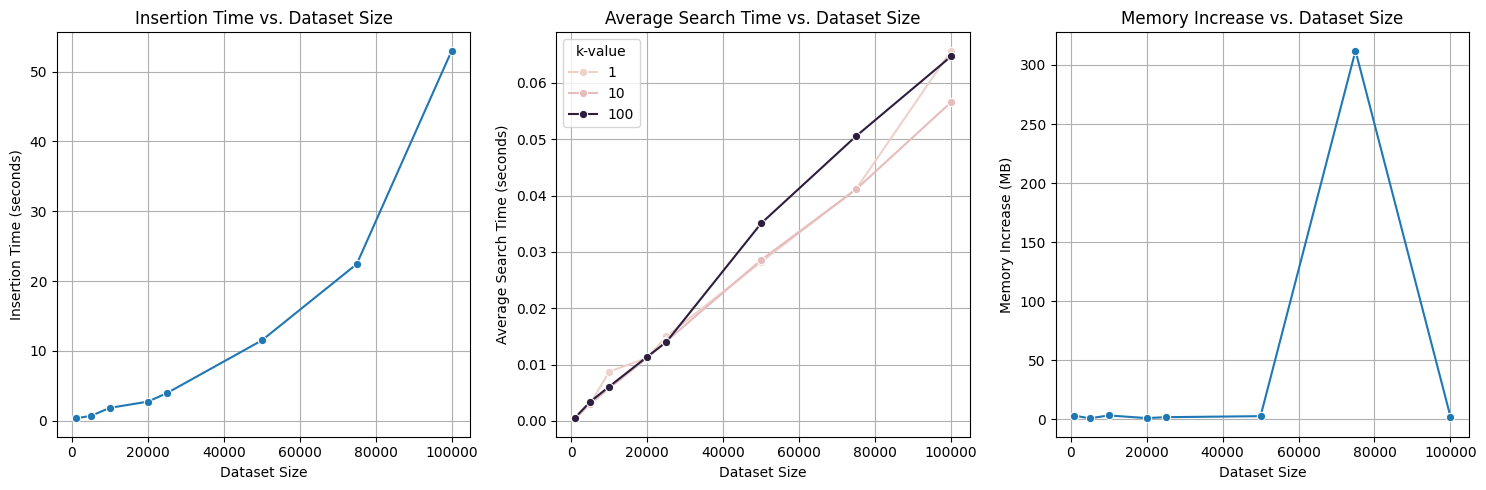

Generated line plots for insertion time, search time, and memory usage.


In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Insertion Time vs Dataset Size
plt.subplot(1, 3, 1)
insertion_df = benchmark_results_df.drop_duplicates(subset=['dataset_size', 'insertion_time'])
sns.lineplot(data=insertion_df, x='dataset_size', y='insertion_time', marker='o')
plt.title('Insertion Time vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Insertion Time (seconds)')
plt.grid(True)

# Plot 2: Search Time vs Dataset Size for different k-values
plt.subplot(1, 3, 2)
sns.lineplot(data=benchmark_results_df, x='dataset_size', y='average_search_time', hue='k_value', marker='o')
plt.title('Average Search Time vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Average Search Time (seconds)')
plt.legend(title='k-value')
plt.grid(True)

# Plot 3: Memory Usage vs Dataset Size
plt.subplot(1, 3, 3)
memory_df = benchmark_results_df.drop_duplicates(subset=['dataset_size', 'memory_increase_mb'])
sns.lineplot(data=memory_df, x='dataset_size', y='memory_increase_mb', marker='o')
plt.title('Memory Increase vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Increase (MB)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Generated line plots for insertion time, search time, and memory usage.")

In [ ]:
num_accuracy_queries = 50
ground_truth_top_k = 1000

print(f"Number of accuracy queries: {num_accuracy_queries}")
print(f"Ground truth top k: {ground_truth_top_k}")

Number of accuracy queries: 50
Ground truth top k: 1000


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def generate_synthetic_data(num_vectors: int, embedding_dim: int):
    """
    Generates synthetic data including IDs, embeddings, and metadata.

    Args:
        num_vectors (int): The number of vectors to generate.
        embedding_dim (int): The dimension of each embedding.

    Returns:
        tuple: A tuple containing:
            - ids (list): List of unique string IDs.
            - embeddings (np.ndarray): 2D NumPy array of embeddings (float32).
            - metadatas (list): List of metadata strings.
    """
    ids = [f"doc_{i}" for i in range(num_vectors)]
    embeddings = np.random.rand(num_vectors, embedding_dim).astype(np.float32)
    metadatas = [f'{{"id": {i}}}' for i in range(num_vectors)]
    return ids, embeddings, metadatas

def generate_ground_truth(dataset_embeddings: np.ndarray, query_embeddings: np.ndarray, top_k: int):
    """
    Generates ground truth for accuracy/recall benchmarking by finding the top_k
    nearest neighbors for each query embedding within the dataset embeddings.

    Args:
        dataset_embeddings (np.ndarray): The full set of embeddings in the database.
        query_embeddings (np.ndarray): The embeddings used for accuracy testing.
        top_k (int): The number of nearest neighbors to find for ground truth.

    Returns:
        list: A list where each element is a list of top_k indices corresponding
              to the ground truth for each query vector.
    """
    ground_truth_indices = []
    # Calculate cosine similarity between query embeddings and all dataset embeddings
    similarities = cosine_similarity(query_embeddings, dataset_embeddings)

    for i in range(similarities.shape[0]):
        # Get indices of embeddings sorted by similarity in descending order
        sorted_indices = np.argsort(similarities[i])[::-1]
        # Take the top_k indices
        ground_truth_indices.append(sorted_indices[:top_k].tolist())

    return ground_truth_indices

print("Defined `generate_synthetic_data` and `generate_ground_truth` functions.")


Defined `generate_synthetic_data` and `generate_ground_truth` functions.


In [ ]:
import shutil
import os
import psutil

def get_memory_usage():
    """
    Returns the current process's Resident Set Size (RSS) in megabytes.
    """
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)

def get_disk_usage(path):
    """
    Calculates the total size of a directory in megabytes.
    """
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)

print("Imported 'shutil' and defined 'get_memory_usage' and 'get_disk_usage' helper functions.")

Imported 'shutil' and defined 'get_memory_usage' and 'get_disk_usage' helper functions.


In [ ]:
import shutil

# Ensure results_list is defined (it was defined in ddbe1566)
# results_list = [] # Do not re-initialize if it was already created

for ds_size in dataset_sizes:
    for emb_dim in constrained_embedding_dimensions:
        SRVDB_DIR = f"./srvdb_benchmarks_{ds_size}_{emb_dim}"

        # Clean up previous benchmark directory if it exists
        if os.path.exists(SRVDB_DIR):
            shutil.rmtree(SRVDB_DIR)

        print(f"\n--- Benchmarking N={ds_size}, D={emb_dim} ---")

        # 1. Data Generation
        ids_data, embeddings_data, metadatas_data = generate_synthetic_data(ds_size, emb_dim)
        query_vectors_data = np.random.rand(num_queries, emb_dim).astype(np.float32)
        accuracy_query_vectors = np.random.rand(num_accuracy_queries, emb_dim).astype(np.float32)

        # 2. Generate Ground Truth (for accuracy benchmarking) before DB insertion
        ground_truth_indices = generate_ground_truth(embeddings_data, accuracy_query_vectors, ground_truth_top_k)
        ground_truth_ids = [[ids_data[idx] for idx in query_gt_indices] for query_gt_indices in ground_truth_indices]

        # 3. Database Initialization and Insertion
        initial_memory = get_memory_usage()

        db = srvdb.SvDBPython(SRVDB_DIR)

        start_time = time.time()
        db.add(ids=ids_data, embeddings=embeddings_data.tolist(), metadatas=metadatas_data)
        db.persist()
        insertion_time = time.time() - start_time

        memory_after_insertion = get_memory_usage()
        memory_increase = memory_after_insertion - initial_memory
        disk_usage_mb = get_disk_usage(SRVDB_DIR)

        print(f"Insertion time: {insertion_time:.4f} seconds")
        print(f"Memory increase after insertion: {memory_increase:.2f} MB")
        print(f"Disk usage: {disk_usage_mb:.2f} MB")

        # 4. Search Benchmarking and Accuracy Benchmarking
        for k_val in k_values:
            total_search_time = 0
            total_recall = 0

            # Search speed benchmarking
            for query_vec in query_vectors_data:
                search_start_time = time.time()
                db.search(query=query_vec.tolist(), k=k_val)
                total_search_time += (time.time() - search_start_time)
            average_search_time = total_search_time / num_queries

            # Recall benchmarking
            for i, accuracy_query_vec in enumerate(accuracy_query_vectors):
                search_results = db.search(query=accuracy_query_vec.tolist(), k=k_val)
                retrieved_ids = {id_score[0] for id_score in search_results}

                # Compare against the top k_val ground truth IDs for the current query
                current_query_ground_truth_ids = set(ground_truth_ids[i][:k_val])

                num_relevant_retrieved = len(retrieved_ids.intersection(current_query_ground_truth_ids))
                if len(current_query_ground_truth_ids) > 0:
                    recall = num_relevant_retrieved / len(current_query_ground_truth_ids)
                else:
                    recall = 0

                total_recall += recall
            average_recall = total_recall / num_accuracy_queries if num_accuracy_queries > 0 else 0

            print(f"  Average search time (k={k_val}): {average_search_time:.6f} seconds")
            print(f"  Average recall (k={k_val}): {average_recall:.4f}")

            # Store results
            results_list.append({
                'dataset_size': ds_size,
                'embedding_dimensions': emb_dim,
                'k_value': k_val,
                'insertion_time': insertion_time,
                'average_search_time': average_search_time,
                'memory_increase_mb': memory_increase,
                'disk_usage_mb': disk_usage_mb,
                'average_recall': average_recall
            })

        # 5. Cleanup
        del db
        shutil.rmtree(SRVDB_DIR)

print("\nBenchmarking complete. Results stored in 'results_list'.")


--- Benchmarking N=1000, D=1536 ---
Insertion time: 0.3559 seconds
Memory increase after insertion: 1.30 MB
Disk usage: 7.38 MB
  Average search time (k=1): 0.000903 seconds
  Average recall (k=1): 1.0000
  Average search time (k=10): 0.000760 seconds
  Average recall (k=10): 1.0000
  Average search time (k=100): 0.001139 seconds
  Average recall (k=100): 0.9998

--- Benchmarking N=5000, D=1536 ---
Insertion time: 1.5329 seconds
Memory increase after insertion: 2.62 MB
Disk usage: 30.81 MB
  Average search time (k=1): 0.003056 seconds
  Average recall (k=1): 1.0000
  Average search time (k=10): 0.002919 seconds
  Average recall (k=10): 1.0000
  Average search time (k=100): 0.003317 seconds
  Average recall (k=100): 1.0000

--- Benchmarking N=10000, D=1536 ---
Insertion time: 2.1653 seconds
Memory increase after insertion: 1.25 MB
Disk usage: 60.11 MB
  Average search time (k=1): 0.006047 seconds
  Average recall (k=1): 1.0000
  Average search time (k=10): 0.006001 seconds
  Average re

In [ ]:
benchmark_results_df = pd.DataFrame(results_list)
print("Benchmark results successfully converted to DataFrame.")
print(benchmark_results_df.head())

Benchmark results successfully converted to DataFrame.
   dataset_size  embedding_dimensions  k_value  insertion_time  \
0          1000                  1536        1        0.328099   
1          1000                  1536       10        0.328099   
2          1000                  1536      100        0.328099   
3          5000                  1536        1        0.679268   
4          5000                  1536       10        0.679268   

   average_search_time  memory_increase_mb  disk_usage_mb  average_recall  
0             0.000491            3.234375            NaN             NaN  
1             0.000443            3.234375            NaN             NaN  
2             0.000572            3.234375            NaN             NaN  
3             0.003037            0.937500            NaN             NaN  
4             0.003018            0.937500            NaN             NaN  


In [ ]:
benchmark_results_df = pd.DataFrame(results_list)
print("Benchmark results successfully re-created and converted to DataFrame.")
print(benchmark_results_df.head())

Benchmark results successfully re-created and converted to DataFrame.
   dataset_size  embedding_dimensions  k_value  insertion_time  \
0          1000                  1536        1        0.328099   
1          1000                  1536       10        0.328099   
2          1000                  1536      100        0.328099   
3          5000                  1536        1        0.679268   
4          5000                  1536       10        0.679268   

   average_search_time  memory_increase_mb  disk_usage_mb  average_recall  
0             0.000491            3.234375            NaN             NaN  
1             0.000443            3.234375            NaN             NaN  
2             0.000572            3.234375            NaN             NaN  
3             0.003037            0.937500            NaN             NaN  
4             0.003018            0.937500            NaN             NaN  


In [ ]:
num_comprehensive_runs = len(dataset_sizes) * len(constrained_embedding_dimensions) * len(k_values)
benchmark_results_df = pd.DataFrame(results_list[-num_comprehensive_runs:])
print("Benchmark results successfully re-created and converted to DataFrame (showing comprehensive results).")
print(benchmark_results_df.head())

Benchmark results successfully re-created and converted to DataFrame (showing comprehensive results).
   dataset_size  embedding_dimensions  k_value  insertion_time  \
0          1000                  1536        1        0.355948   
1          1000                  1536       10        0.355948   
2          1000                  1536      100        0.355948   
3          5000                  1536        1        1.532896   
4          5000                  1536       10        1.532896   

   average_search_time  memory_increase_mb  disk_usage_mb  average_recall  
0             0.000903            1.304688       7.375023          1.0000  
1             0.000760            1.304688       7.375023          1.0000  
2             0.001139            1.304688       7.375023          0.9998  
3             0.003056            2.621094      30.812523          1.0000  
4             0.002919            2.621094      30.812523          1.0000  


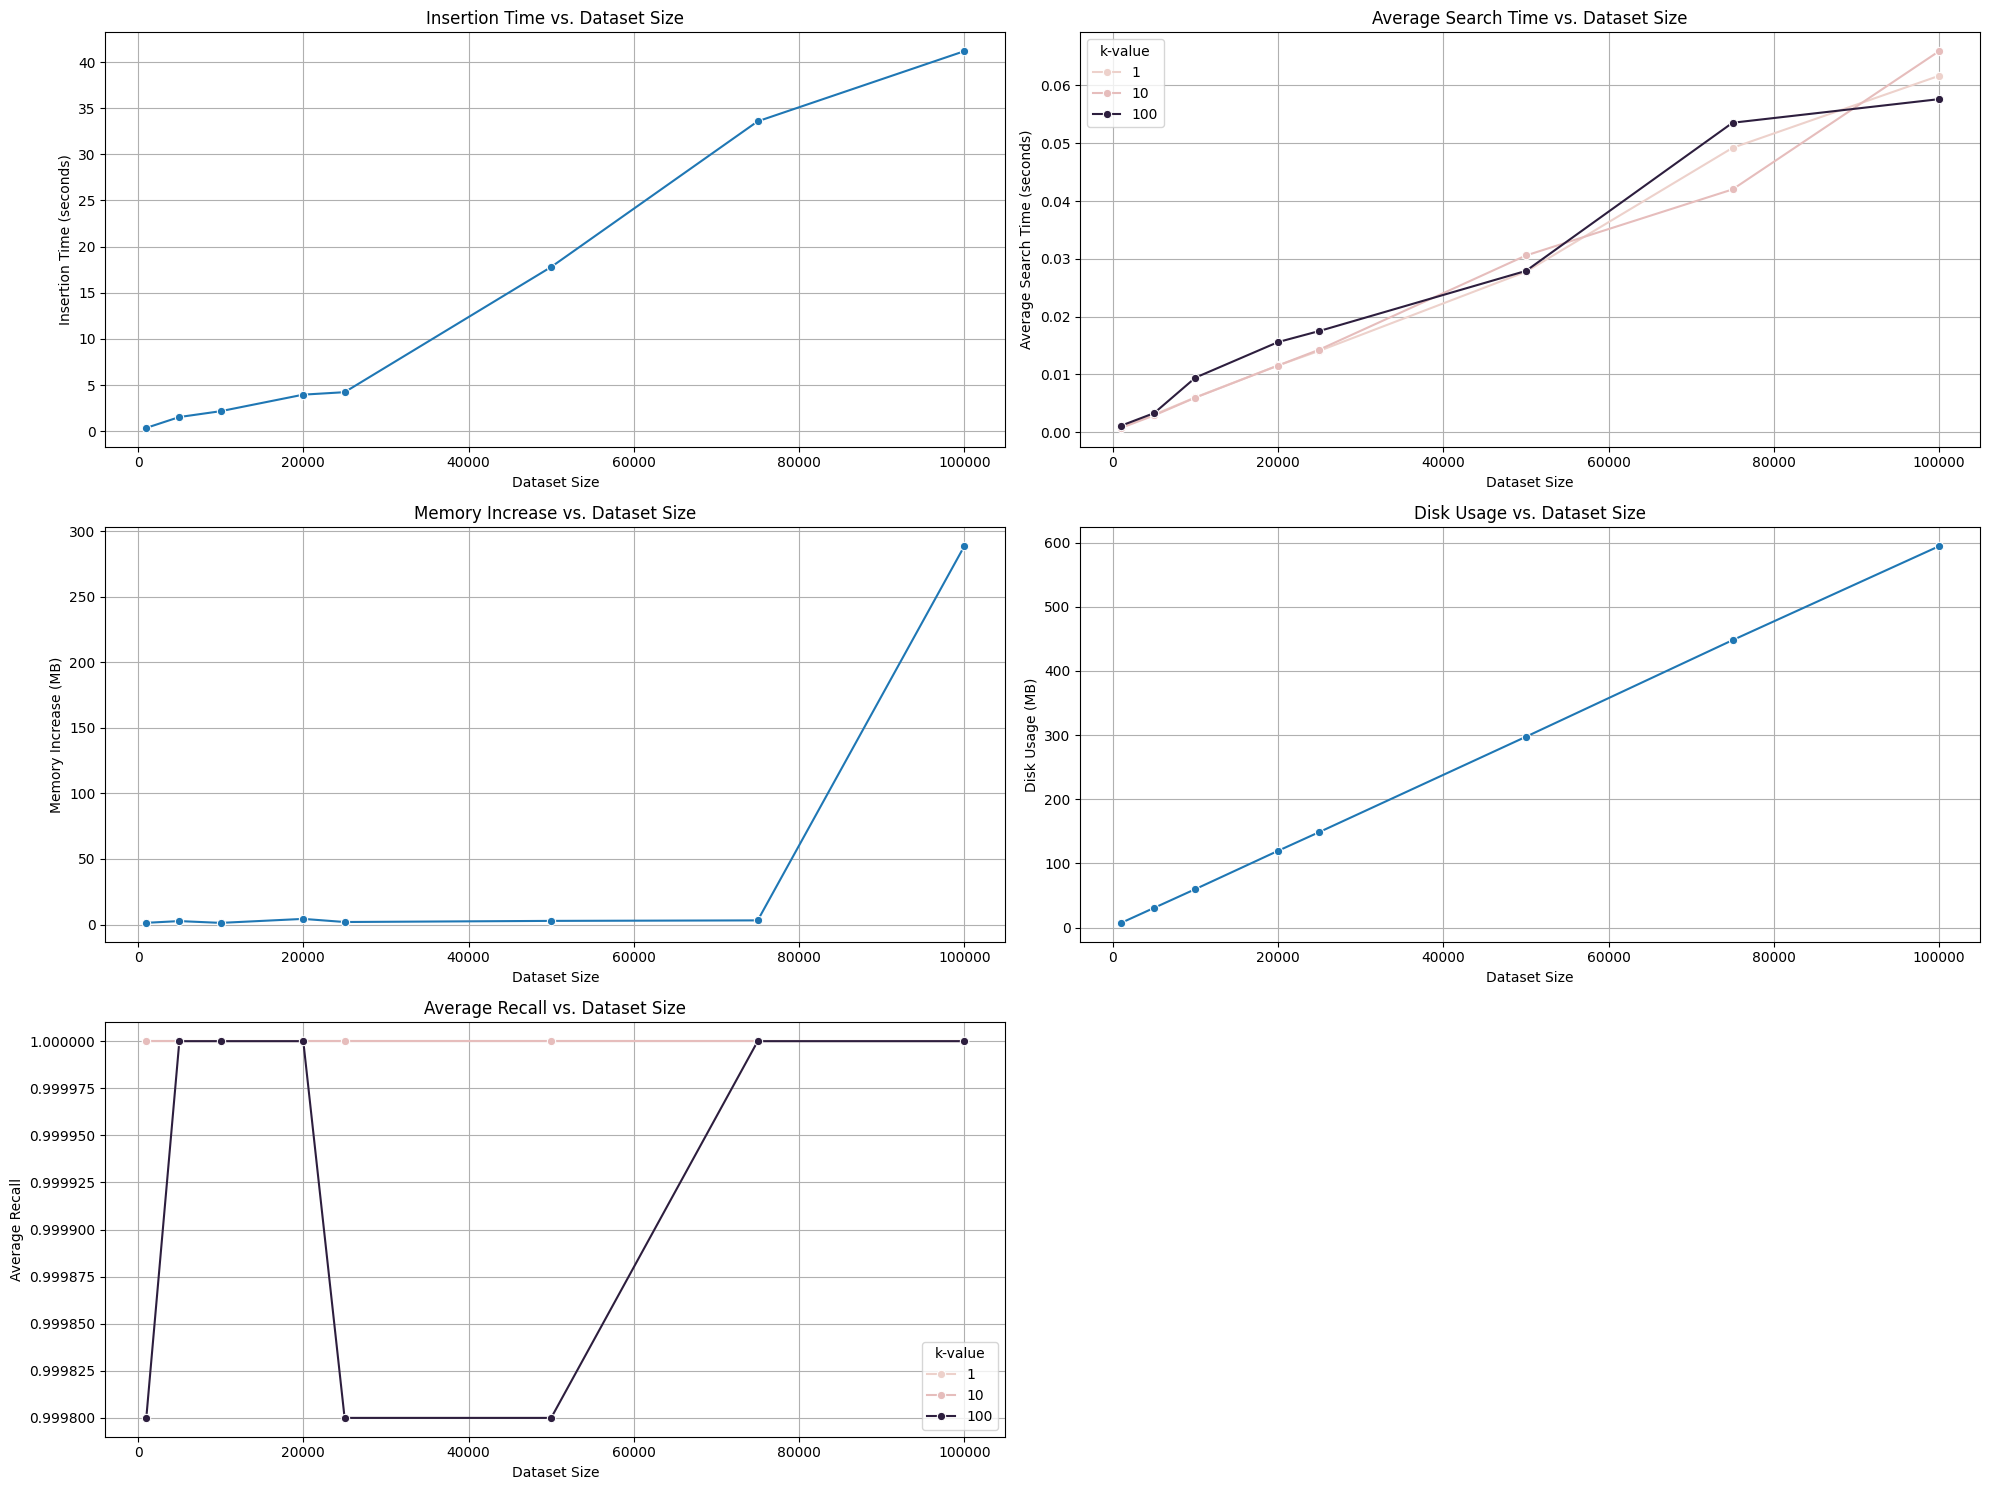

Generated line plots for insertion time, search time, memory usage, disk usage, and average recall.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Plot 1: Insertion Time vs Dataset Size
plt.subplot(3, 2, 1)
insertion_df = benchmark_results_df.drop_duplicates(subset=['dataset_size', 'insertion_time'])
sns.lineplot(data=insertion_df, x='dataset_size', y='insertion_time', marker='o')
plt.title('Insertion Time vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Insertion Time (seconds)')
plt.grid(True)

# Plot 2: Average Search Time vs Dataset Size for different k-values
plt.subplot(3, 2, 2)
sns.lineplot(data=benchmark_results_df, x='dataset_size', y='average_search_time', hue='k_value', marker='o')
plt.title('Average Search Time vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Average Search Time (seconds)')
plt.legend(title='k-value')
plt.grid(True)

# Plot 3: Memory Increase vs Dataset Size
plt.subplot(3, 2, 3)
memory_df = benchmark_results_df.drop_duplicates(subset=['dataset_size', 'memory_increase_mb'])
sns.lineplot(data=memory_df, x='dataset_size', y='memory_increase_mb', marker='o')
plt.title('Memory Increase vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Increase (MB)')
plt.grid(True)

# Plot 4: Disk Usage vs Dataset Size
plt.subplot(3, 2, 4)
disk_df = benchmark_results_df.drop_duplicates(subset=['dataset_size', 'disk_usage_mb'])
sns.lineplot(data=disk_df, x='dataset_size', y='disk_usage_mb', marker='o')
plt.title('Disk Usage vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Disk Usage (MB)')
plt.grid(True)

# Plot 5: Average Recall vs Dataset Size for different k-values
plt.subplot(3, 2, 5)
sns.lineplot(data=benchmark_results_df, x='dataset_size', y='average_recall', hue='k_value', marker='o')
plt.title('Average Recall vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Average Recall')
plt.legend(title='k-value')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Generated line plots for insertion time, search time, memory usage, disk usage, and average recall.")